<a href="https://colab.research.google.com/github/Arifuzzaman-Munaf/Data-Visualization-Python/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Histogram?
A histogram is a type of bar chart that represents the distribution of numerical data by showing the frequency of data points within certain ranges, known as bins. It is a powerful tool in statistics for providing a visual interpretation of numerical data by indicating the number of data points that lie within each range or bin.

*Here’s how a histogram works:*
1.	***Data Segmentation:*** The range of the data is divided into **intervals** or **bins**. The bins are typically of equal size, although they don’t necessarily have to be.
2.	***Frequency Count:*** For each bin, the number of data points from the dataset that fall within the range of the bin is counted.
3.	***Bar Representation***: Each bin is represented by a bar whose height corresponds to the frequency count of the data points within that bin.

**Use Cases of a Histogram:**
*	Understanding the distribution of data.
*	Detecting patterns like skewness or outliers.
*	Comparing frequency distributions.<br><br>

In this lab, we will focus on several real life examples on how to use histograms using a real world dataset. We will also experiment with difference attributes of histograms for better visualization.

# Install dependencies and import libraries

In [19]:
!pip install pandas
!pip install numpy
!pip install matplotlib

* The line **`plt.style.use('ggplot')`** is used to change the visual style of plots created using the matplotlib.pyplot module.<br>
* **`%matplotlib inline`** ensures that plots generated by Matplotlib are displayed directly within the Jupyter Notebook, instead of opening in separate windows. This makes your visualizations easily viewable and integrated into your notebook's workflow.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# Dataset : California Wildfire Damage (2014-2025)
The dataset used in this analysis, "***California Wildfire Damage (2014-Feb 2025)***," is sourced from Kaggle and provided by Vivek Attri. It covers wildfire incidents in California from 2014 through February 2025, including details such as fire cause, location, and impact metrics.

You can access the dataset and view its licensing terms here: [Kaggle Dataset Link](https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025).


In [21]:
# Load the CSV file into a DataFrame
dataset = pd.read_csv("California Wildfire Damage.csv")

# Display the first few rows to confirm it's loaded correctly
dataset.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


Let's find out how many entries there are in our dataset.<br><br>
**`dataset.shape`** tells you how many rows and columns that spreadsheet has. This helps you understand the size and structure of your data.

In [22]:
dataset.shape

(100, 11)

Let's see if we have any null value in any column or not

In [23]:
dataset.isnull().sum()

,0
Incident_ID,0
Date,0
Location,0
Area_Burned (Acres),0
Homes_Destroyed,0
Businesses_Destroyed,0
Vehicles_Damaged,0
Injuries,0
Fatalities,0
Estimated_Financial_Loss (Million $),0


# Task 1
In this task, we will visualize the distribution of wildfire sizes by plotting a histogram for the “Area Burned (Acres)” column from the “California Wildfire Damage” dataset. The histogram will help us understand how wildfire sizes vary, identify any common ranges, and detect potential outliers.

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [37]:
'''
np.histogram returns 2 values : frequency count and bin ranges
The default value for bin_ranges = 10
'''
count, bin_edges = np.histogram(dataset['Area_Burned (Acres)'])

# Generate a DataFrame for a clearer tabular presentation
histogram_table = pd.DataFrame({
    'Bin Range': [f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(bin_edges)-1)],
    'Frequency': count
})

histogram_table


,Bin Range,Frequency
0,357.0 - 5286.6,9
1,5286.6 - 10216.2,7
2,10216.2 - 15145.800000000001,8
3,15145.800000000001 - 20075.4,14
4,20075.4 - 25005.0,10
5,25005.0 - 29934.600000000002,9
6,29934.600000000002 - 34864.200000000004,9
7,34864.200000000004 - 39793.8,9
8,39793.8 - 44723.4,13
9,44723.4 - 49653.0,12


By default, the histrogram method breaks up the dataset into 10 bins. From the table above we can see that
* 	The first bin, representing areas between 357 and 5286.6 acres, shows a high frequency (9 occurrences), indicating that smaller wildfires are more common.
* The highest frequency of fires occurs in the 15145.8 to 20075.4 acres range (14 occurrences), suggesting that fires of this size are particularly prevalent.
*  There is a consistent frequency of larger fires, with several bins showing significant counts (e.g., 39793.8 to 44723.4 acres with 13 occurrences), pointing to the recurrent nature of large-scale wildfires.
<br><br>
Now we can plot the histogram of this table for better clearity

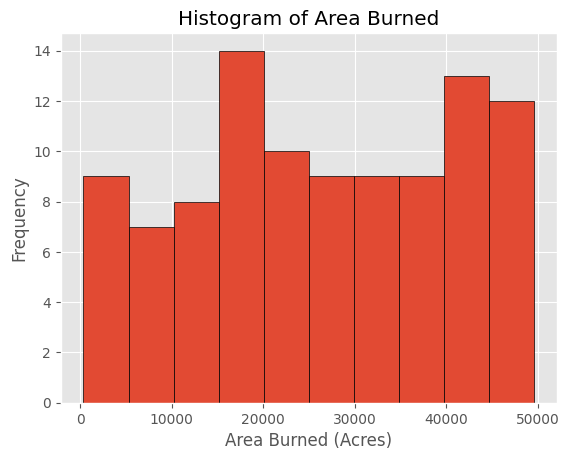

In [45]:
# Create a histogram of the 'Area_Burned (Acres)' column
dataset['Area_Burned (Acres)'].plot(kind = "hist", edgecolor="black")  # Adjust the number of bins as needed
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Frequency')
plt.title('Histogram of Area Burned')
plt.show()

In the above plot, the x-axis represents the Area Burned with an intervals of 4929.6 and y-axis represents the frequency of specific bins

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

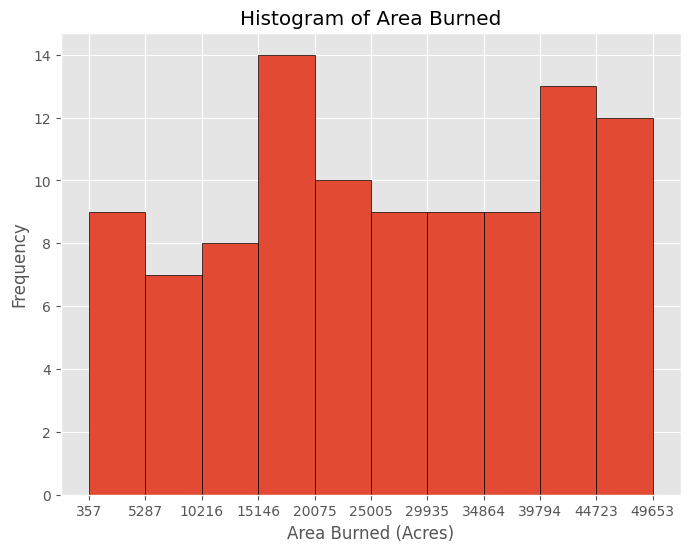

In [48]:
dataset['Area_Burned (Acres)'].plot(kind = "hist", xticks=bin_edges, edgecolor="black", figsize=(8,6))  # got bin_edges from histogram Table
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Frequency')
plt.title('Histogram of Area Burned')
plt.show()

# Task 2
In this task, we will visualize the distribution by plotting a histogram for the "**Homes Destroyed**" column with restpect to "**Location**" from the “California Wildfire Damage” dataset. <br>
Here, we will plot histogram for ***`Sonoma County, Shasta County, and Los Angeles County`***

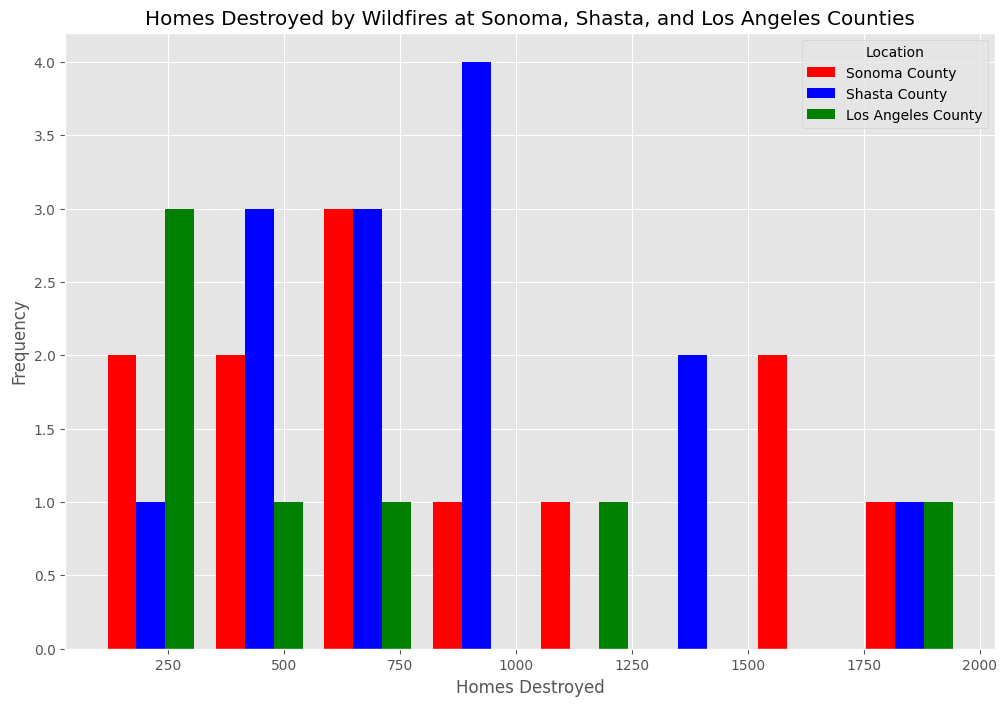

In [102]:
# Filter the data for the selected locations
sonoma_data = dataset[dataset['Location'] == 'Sonoma County']['Homes_Destroyed']
shasta_data = dataset[dataset['Location'] == 'Shasta County']['Homes_Destroyed']
la_data = dataset[dataset['Location'] == 'Los Angeles County']['Homes_Destroyed']

# Plot the histograms for all three locations in one plt.hist call
plt.figure(figsize=(12, 8))
plt.hist(
    [sonoma_data, shasta_data, la_data],
    bins=8,
    color=['red', 'blue', 'green'],
    label=['Sonoma County', 'Shasta County', 'Los Angeles County']
)

plt.xlabel('Homes Destroyed')
plt.ylabel('Frequency')
plt.title('Homes Destroyed by Wildfires at Sonoma, Shasta, and Los Angeles Counties')
plt.legend(title='Location')
plt.show()

**Remark:** *Instead of using dataset.plot(type='hist', [other attributes]), we can employ plt.hist(dataset, [other attributes]). This alternative approach offers greater versatility when creating complex visualizations. italicized text*

## Author

<a href="https://www.linkedin.com/in/arifuzzaman-munaf/">Md. Arifuzzaman Munaf </a>